In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df = pd.read_csv('./Train_UWu5bXk.csv')

In [4]:
df.describe()

/home/marisol/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,NaN,0.026989,93.826500,1987.000000,834.247400
50%,NaN,0.053931,143.012800,1999.000000,1794.331000
75%,NaN,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [5]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
df['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
5                Baking Goods
6                 Snack Foods
7                 Snack Foods
8                Frozen Foods
9                Frozen Foods
10      Fruits and Vegetables
11                      Dairy
12      Fruits and Vegetables
13                Snack Foods
14      Fruits and Vegetables
15                  Breakfast
16         Health and Hygiene
17                  Breakfast
18                Hard Drinks
19                      Dairy
20                Snack Foods
21               Baking Goods
22                  Household
23               Baking Goods
24               Frozen Foods
25                  Household
26                Snack Foods
27                Hard Drinks
28                      Dairy
29                     Canned
                ...          
8493              Snack Foods
8494                Household
8495      

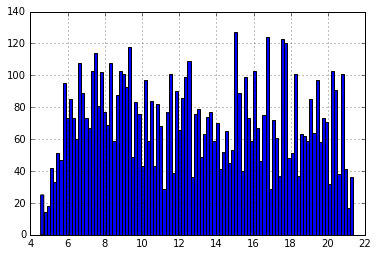

In [8]:
%matplotlib inline
df['Item_Weight'].hist(bins=100)

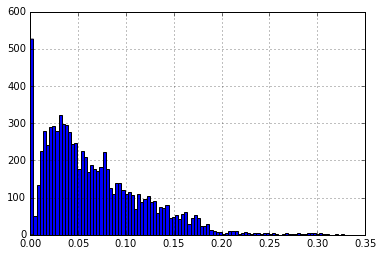

In [17]:
df['Item_Visibility'].hist(bins=100)

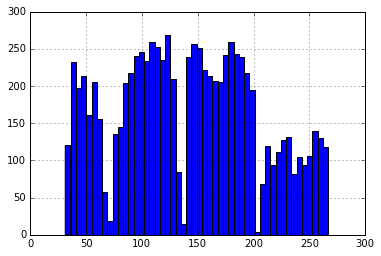

In [18]:
df['Item_MRP'].hist(bins=50)

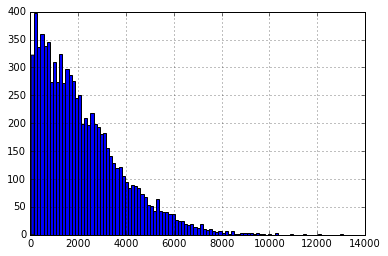

In [21]:
df['Item_Outlet_Sales'].hist(bins=100)

{'boxes': [<matplotlib.lines.Line2D at 0x2b77056ac350>],
 'caps': [<matplotlib.lines.Line2D at 0x2b77056b9190>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b77056c4490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2b77056b9e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2b77056ac090>,
  <matplotlib.lines.Line2D at 0x2b77056acb10>]}

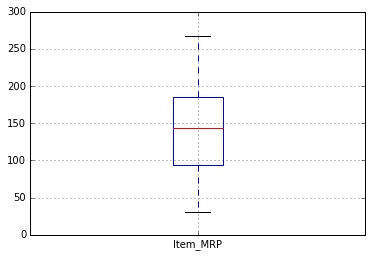

In [10]:
df.boxplot(column='Item_MRP', return_type='dict')

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


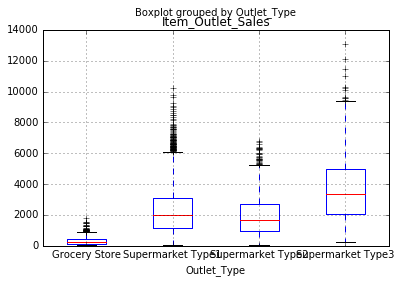

In [11]:
df.boxplot(column='Item_Outlet_Sales',by='Outlet_Type')

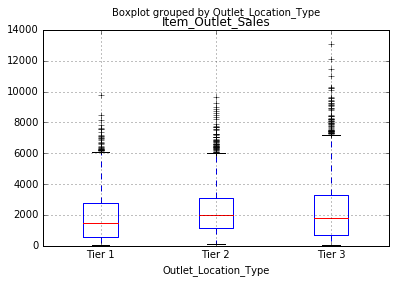

In [34]:
df.boxplot(column='Item_Outlet_Sales',by='Outlet_Location_Type')

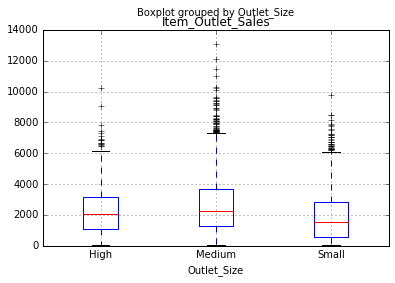

In [35]:
df.boxplot(column='Item_Outlet_Sales',by='Outlet_Size')

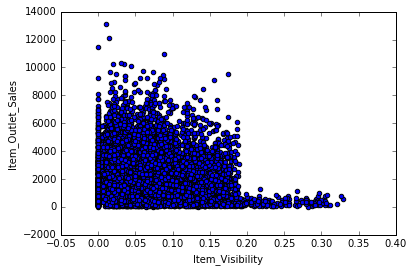

In [37]:
df.plot(kind='scatter', y='Item_Outlet_Sales', x='Item_Visibility');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7156dc6810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f71564178d0>]], dtype=object)

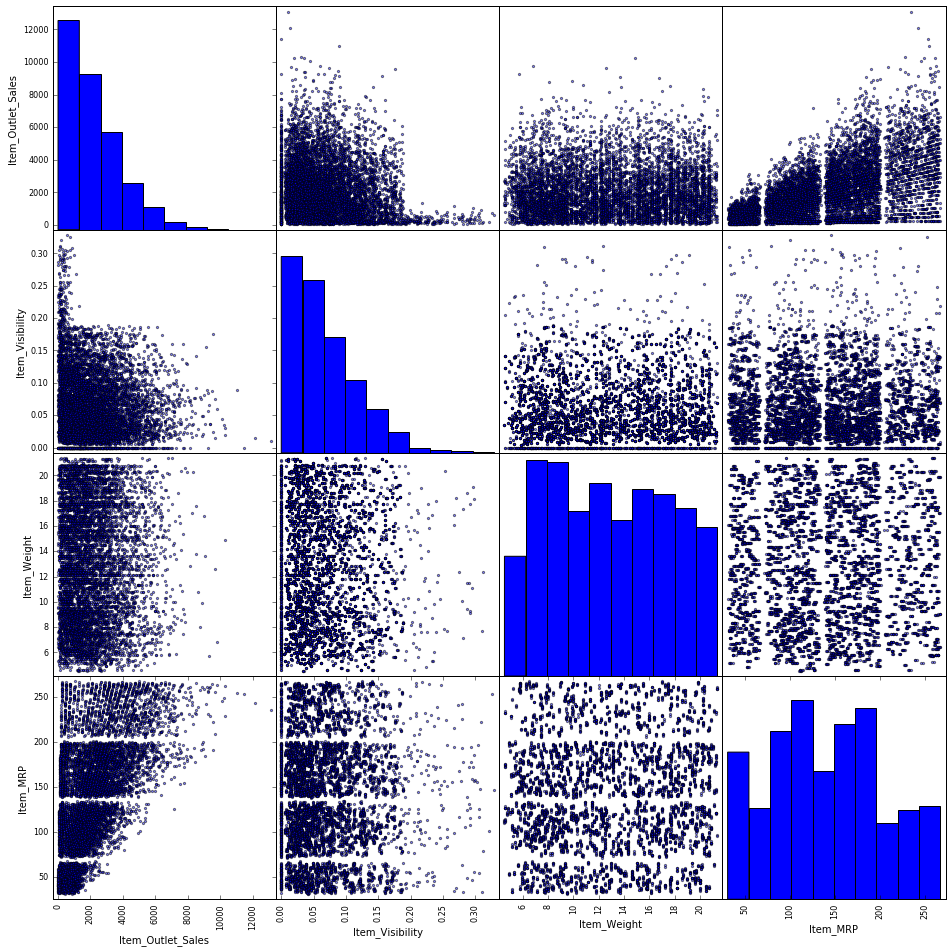

In [46]:
from pandas.tools.plotting import scatter_matrix
cont_df=df[['Item_Outlet_Sales','Item_Visibility','Item_Weight', 'Item_MRP']]
scatter_matrix(cont_df,figsize=(16, 16))

In [56]:
pd.pivot_table(df, index=['Outlet_Location_Type', 'Outlet_Size'],aggfunc=[np.mean, np.median])

mean                    \
                                    Item_MRP Item_Outlet_Sales   
Outlet_Location_Type Outlet_Size                                 
Tier 1               Medium       140.297699       2348.354635   
                     Small        141.235221       1576.192909   
Tier 2               Small        143.122481       2438.841866   
Tier 3               High         141.425982       2298.995256   
                     Medium       140.736687       2847.959679   

                                                              \
                                 Item_Visibility Item_Weight   
Outlet_Location_Type Outlet_Size                               
Tier 1               Medium             0.060806   12.917446   
                     Small              0.077839   12.866801   
Tier 2               Small              0.061263   12.829349   
Tier 3               High               0.059957   13.006148   
                     Medium             0.059810   12.873346   

                                                              median  \
                                 Outlet_Establishment_Year  Item_MRP   
Outlet_Location_Type Outlet_Size                                       
Tier 1               Medium                    1999.000000  141.8154   
                     Small                     1992.654321  143.8115   
Tier 2               Small                     2004.000000  145.9760   
Tier 3               High                      1987.000000  142.0470   
                     Medium                    1996.954911  142.0154   

                                                                    \
                                 Item_Outlet_Sales Item_Visibility   
Outlet_Location_Type Outlet_Size                                     
Tier 1               Medium              1966.1074        0.048937   
                     Small               1040.6454        0.061742   
Tier 2               Small               2109.2544        0.053688   
Tier 3               High                2050.6640        0.049587   
                     Medium              2350.9398        0.048830   

                                                                        
                                 Item_Weight Outlet_Establishment_Year  
Outlet_Location_Type Outlet_Size                                        
Tier 1               Medium            12.65                      1999  
                     Small             12.60                      1997  
Tier 2               Small             12.55                      2004  
Tier 3               High              12.85                      1987  
                     Medium            12.60                      1985

In [12]:
df_mean=df
df_mean['Item_Weight'].fillna(df_mean['Item_Weight'].mean(),inplace=True)
df_mean['Item_Weight'].fillna(df_mean['Item_Weight'].mean(),inplace=True)

In [13]:
df_median=df
df_median['Item_Weight'].fillna(df_median['Item_Weight'].median(),inplace=True)
df_median['Item_Weight'].fillna(df_median['Item_Weight'].median(),inplace=True)

In [14]:
 df_mean.apply(lambda x: sum(x.isnull()),axis=0) 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [35]:
pd.pivot_table(df, index=['Outlet_Location_Type', 'Outlet_Size'],aggfunc='count')

Item_Fat_Content  Item_Identifier  Item_MRP  \
Outlet_Location_Type Outlet_Size                                                
Tier 1               Medium                    930              930       930   
                     Small                    1458             1458      1458   
Tier 2               Small                     930              930       930   
Tier 3               High                      932              932       932   
                     Medium                   1863             1863      1863   

                                  Item_Outlet_Sales  Item_Type  \
Outlet_Location_Type Outlet_Size                                 
Tier 1               Medium                     930        930   
                     Small                     1458       1458   
Tier 2               Small                      930        930   
Tier 3               High                       932        932   
                     Medium                    1863       1863   

                                  Item_Visibility  Item_Weight  \
Outlet_Location_Type Outlet_Size                                 
Tier 1               Medium                   930          930   
                     Small                   1458         1458   
Tier 2               Small                    930          930   
Tier 3               High                     932          932   
                     Medium                  1863         1863   

                                  Outlet_Establishment_Year  \
Outlet_Location_Type Outlet_Size                              
Tier 1               Medium                             930   
                     Small                             1458   
Tier 2               Small                              930   
Tier 3               High                               932   
                     Medium                            1863   

                                  Outlet_Identifier  Outlet_Type  
Outlet_Location_Type Outlet_Size                                  
Tier 1               Medium                     930          930  
                     Small                     1458         1458  
Tier 2               Small                      930          930  
Tier 3               High                       932          932  
                     Medium                    1863         1863

In [37]:
df.pivot_table(values='Outlet_Identifier',index=['Outlet_Location_Type','Outlet_Size'],aggfunc='count')

Outlet_Location_Type  Outlet_Size
Tier 1                Medium          930
                      Small          1458
Tier 2                Small           930
Tier 3                High            932
                      Medium         1863
Name: Outlet_Identifier, dtype: int64

In [38]:
df['Outlet_Location_Type'] == 'Tier 2'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8        True
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19       True
20      False
21      False
22       True
23      False
24      False
25       True
26       True
27      False
28      False
29      False
        ...  
8493     True
8494     True
8495     True
8496     True
8497     True
8498    False
8499     True
8500     True
8501     True
8502     True
8503     True
8504    False
8505    False
8506    False
8507     True
8508     True
8509    False
8510     True
8511    False
8512    False
8513     True
8514     True
8515    False
8516    False
8517    False
8518    False
8519     True
8520     True
8521    False
8522    False
Name: Outlet_Location_Type, dtype: bool

In [106]:
df_mean.head()

TypeError: 'Index' object is not callable

In [68]:
df_mean[(df_mean['Outlet_Location_Type'] == 'Tier 1') & (df_mean['Outlet_Size']=='NaN')]['Outlet_Size'] = 'Small'
df_mean[(df_mean['Outlet_Location_Type'] == 'Tier 2') & (df_mean['Outlet_Size'].isnull())]['Outlet_Size'] = 'Small'
df_mean[(df_mean['Outlet_Location_Type'] == 'Tier 3') & (df_mean['Outlet_Size'].isnull())]['Outlet_Size'] = 'Medium'

/home/marisol/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/marisol/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [59]:
df_mean.pivot_table(values='Outlet_Identifier',index=['Outlet_Location_Type','Outlet_Size'],aggfunc='count')

Outlet_Location_Type  Outlet_Size
Tier 1                Medium          930
                      Small          1458
Tier 2                Small           930
Tier 3                High            932
                      Medium         1863
Name: Outlet_Identifier, dtype: int64

In [120]:
 df_mean.apply(lambda x: sum(x.isnull()),axis=0) 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [109]:
#df.loc[(df['column1'] == some_value) & (df['column2'] == some_other_value), ['column_to_change']] = new_value
df_mean['Outlet_Size'].dtype

dtype('O')

In [119]:
df_mean.loc[(df_mean['Outlet_Location_Type'] == 'Tier 3') & (pd.isnull(df_mean['Outlet_Size'])),['Outlet_Size']] = 'Medium'
df_mean.loc[(df_mean['Outlet_Location_Type'] == 'Tier 2') & (pd.isnull(df_mean['Outlet_Size'])),['Outlet_Size']] = 'Small'
df_mean.loc[(df_mean['Outlet_Location_Type'] == 'Tier 1') & (pd.isnull(df_mean['Outlet_Size'])),['Outlet_Size']] = 'Small'